# **Analyzing a GOAT: An Analysis of Michael Jordan's Regular Season Statistics**

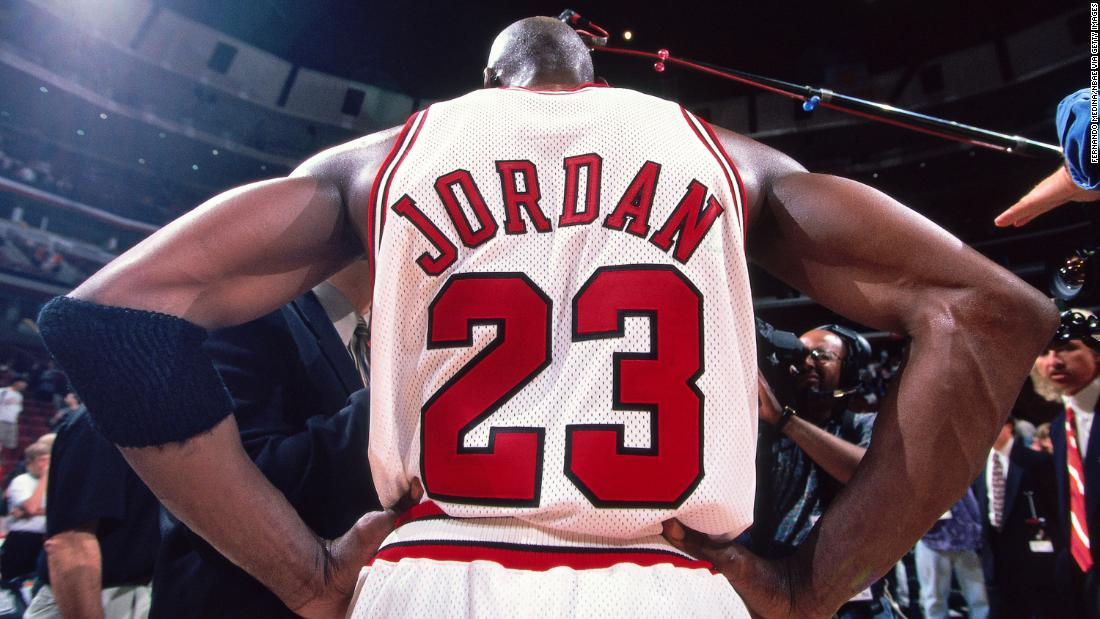

# **Dataset:**


*   The dataset we are using contains Michael Jordan's regular season statistics. Each row contains stats from every single regular season game that Michael Jordan has played in his NBA career. Some statistics include the number points he scored in a game, the opposing team he was facing, and the number of minutes he played in that respective game.



In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")
from statistics import mean

In [ ]:
URL = "https://sports-statistics.com/database/basketball-data/nba/michael-jordan-nba-career-regular-season-stats-by-game.csv"
GOAT = Table.read_table(URL)
GOAT = GOAT.drop("Rk", "G", "Diff", "GS", "GmSc", "Age")
GOAT

EndYear,Date,Years,Days,Tm,Home,Opp,Win,MP,FG,FGA,FG_PCT,3P,3PA,3P_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1985,10/26/1984,21,252,CHI,1,WSB,1,40,5,16,0.313,0,0,nan,6,7,0.857,1,5,6,7,2,4,5,2,16
1985,10/27/1984,21,253,CHI,0,MIL,0,34,8,13,0.615,0,0,nan,5,5,1,3,2,5,5,2,1,3,4,21
1985,10/29/1984,21,255,CHI,1,MIL,1,34,13,24,0.542,0,0,nan,11,13,0.846,2,2,4,5,6,2,3,4,37
1985,10/30/1984,21,256,CHI,0,KCK,1,36,8,21,0.381,0,0,nan,9,9,1,2,2,4,5,3,1,6,5,25
1985,11/1/1984,21,258,CHI,0,DEN,0,33,7,15,0.467,0,0,nan,3,4,0.75,3,2,5,5,1,1,2,4,17
1985,11/7/1984,21,264,CHI,0,DET,1,27,9,19,0.474,0,0,nan,7,9,0.778,1,3,4,3,3,1,5,5,25
1985,11/8/1984,21,265,CHI,0,NYK,1,33,15,22,0.682,0,0,nan,3,4,0.75,4,4,8,5,3,2,5,2,33
1985,11/10/1984,21,267,CHI,0,IND,1,42,9,22,0.409,0,0,nan,9,12,0.75,2,7,9,4,2,5,3,4,27
1985,11/13/1984,21,270,CHI,1,SAS,1,43,18,27,0.667,1,1,1,8,11,0.727,2,8,10,4,3,2,4,4,45
1985,11/15/1984,21,272,CHI,1,BOS,0,33,12,24,0.5,0,1,0,3,3,1,0,2,2,2,2,1,1,4,27


According to the original data table, there do not seem to be any missing values. One problem is that if a data value is unknown, the string "nan" is inserted in place of that data. Other than that, the data is consistent



---


#**Question 1:** Which was Michael Jordan's worst regular season game?



---



First, we are going to find Jordan's worst regular season game by first finding the games that fall in the range 10%-30% for the FG_PCT.

In [ ]:
#Finding games that fall in the range 10% to 30% in the FG_PCT column
lowest_PCT = GOAT.where("FG_PCT",lambda w: 0 < w < .3).sort("FG_PCT", descending=False)
lowest_PCT

EndYear,Date,Years,Days,Tm,Home,Opp,Win,MP,FG,FGA,FG_PCT,3P,3PA,3P_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2003,12/15/2002,39,301,WAS,0,TOR,1,40,1,9,0.111,0,0,nan,0,0,nan,2,6,8,9,2,1,0,2,2
1998,1/30/1998,34,347,CHI,0,GSW,1,41,2,17,0.118,0,0,nan,10,11,0.909,3,5,8,3,3,1,2,0,14
1987,12/13/1986,23,299,CHI,1,MIL,0,31,3,17,0.176,0,0,nan,5,8,0.625,0,4,4,2,0,1,2,2,11
2002,12/21/2001,38,307,WAS,0,ORL,1,34,3,16,0.188,0,0,nan,6,6,1,3,3,6,8,1,0,3,1,12
2002,11/11/2001,38,267,WAS,1,SEA,0,39,5,26,0.192,0,1,0,6,6,1,3,9,12,4,1,2,1,4,16
1993,11/28/1992,29,285,CHI,0,NYK,0,38,4,20,0.2,0,1,0,9,9,1,3,3,6,4,1,0,0,2,17
2002,12/27/2001,38,313,WAS,0,IND,0,25,2,10,0.2,1,2,0.5,1,2,0.5,2,2,4,4,0,0,4,1,6
2002,4/2/2002,39,44,WAS,1,LAL,0,12,1,5,0.2,0,0,nan,0,0,nan,0,3,3,3,0,0,0,1,2
2002,3/20/2002,39,31,WAS,0,DEN,1,16,2,9,0.222,0,0,nan,3,3,1,0,1,1,2,2,0,2,0,7
1985,11/17/1984,21,274,CHI,1,PHI,0,44,4,17,0.235,0,0,nan,8,8,1,0,5,5,7,5,2,4,5,16




---

Next, we are going to find the number of points he scored per period.

In [ ]:
#Creating table with a new column containing the number of points he scored per period.
mean(lowest_PCT.column("PTS"))
pts = np.array(lowest_PCT.column("PTS"))
mins = np.array(lowest_PCT.column("MP"))
pts_per_period = (pts / (mins)) * 12
worst_GOAT = lowest_PCT.with_column("PTS_P", pts_per_period)
worst_GOAT

EndYear,Date,Years,Days,Tm,Home,Opp,Win,MP,FG,FGA,FG_PCT,3P,3PA,3P_PCT,FT,FTA,FT_PCT,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS_P
2003,12/15/2002,39,301,WAS,0,TOR,1,40,1,9,0.111,0,0,nan,0,0,nan,2,6,8,9,2,1,0,2,2,0.6
1998,1/30/1998,34,347,CHI,0,GSW,1,41,2,17,0.118,0,0,nan,10,11,0.909,3,5,8,3,3,1,2,0,14,4.09756
1987,12/13/1986,23,299,CHI,1,MIL,0,31,3,17,0.176,0,0,nan,5,8,0.625,0,4,4,2,0,1,2,2,11,4.25806
2002,12/21/2001,38,307,WAS,0,ORL,1,34,3,16,0.188,0,0,nan,6,6,1,3,3,6,8,1,0,3,1,12,4.23529
2002,11/11/2001,38,267,WAS,1,SEA,0,39,5,26,0.192,0,1,0,6,6,1,3,9,12,4,1,2,1,4,16,4.92308
1993,11/28/1992,29,285,CHI,0,NYK,0,38,4,20,0.2,0,1,0,9,9,1,3,3,6,4,1,0,0,2,17,5.36842
2002,12/27/2001,38,313,WAS,0,IND,0,25,2,10,0.2,1,2,0.5,1,2,0.5,2,2,4,4,0,0,4,1,6,2.88
2002,4/2/2002,39,44,WAS,1,LAL,0,12,1,5,0.2,0,0,nan,0,0,nan,0,3,3,3,0,0,0,1,2,2
2002,3/20/2002,39,31,WAS,0,DEN,1,16,2,9,0.222,0,0,nan,3,3,1,0,1,1,2,2,0,2,0,7,5.25
1985,11/17/1984,21,274,CHI,1,PHI,0,44,4,17,0.235,0,0,nan,8,8,1,0,5,5,7,5,2,4,5,16,4.36364


# **Visualizations:**

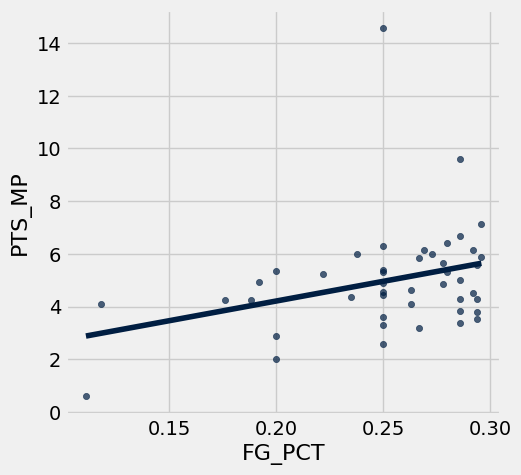

In [ ]:
worst_GOAT.scatter("FG_PCT", "PTS_MP",  fit_line= True)

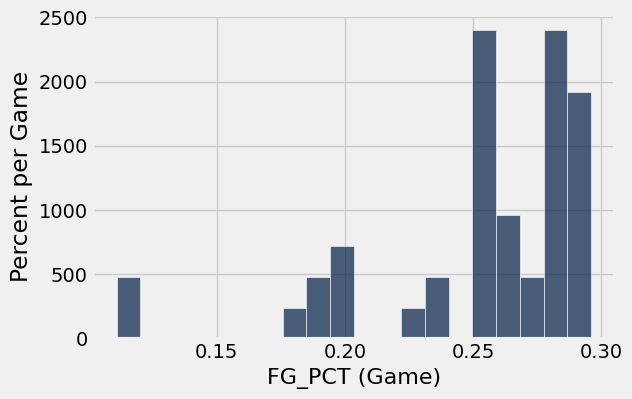

In [ ]:
worst_GOAT.hist("FG_PCT", unit="Game", bins=20)

Based on the scatterplot graph, there is a positive correlation between field goal percentage and points per period. Since there is a positive correlation, this dataset could be used to determine some of his worst games played. According to the data table, worst_GOAT, Michael Jordan's worst game was on December 15, 2002, when he played on Washington against Toronto. This is due to the fact that both the field-goal percentage and the points per period are at the lowest for this game. It makes sense that he played poorly during this game because the game was so late in Jordan's career.



---


# **Question 2:** Which opponent in the regular season was the toughest for Michael Jordan when he played for the bulls?


---



To answer this question, we need to first filter the original GOAT table to make it show only the games where Michael Jordan lost. First, we make a new table that only shows the columns of his team, his opponents, and whether he lost or not. Then we make it show the games he played on Bulls only and the games he lost. From there, we count how much each team has won against the Bulls.

In [ ]:
#Gets the opponents Michael Jordan has faced with the Bulls
TUFF_GOAT = GOAT.select("Tm", "Opp", "Win").where("Tm", "CHI").where("Win", 0)
TUFF_OPP = TUFF_GOAT.group("Opp").sort("count", descending=True)
TUFF_OPP

Opp,count
DET,26
CLE,24
PHI,23
IND,21
ATL,20
BOS,20
MIL,14
NYK,14
NJN,13
HOU,12


# **Visualizations:**

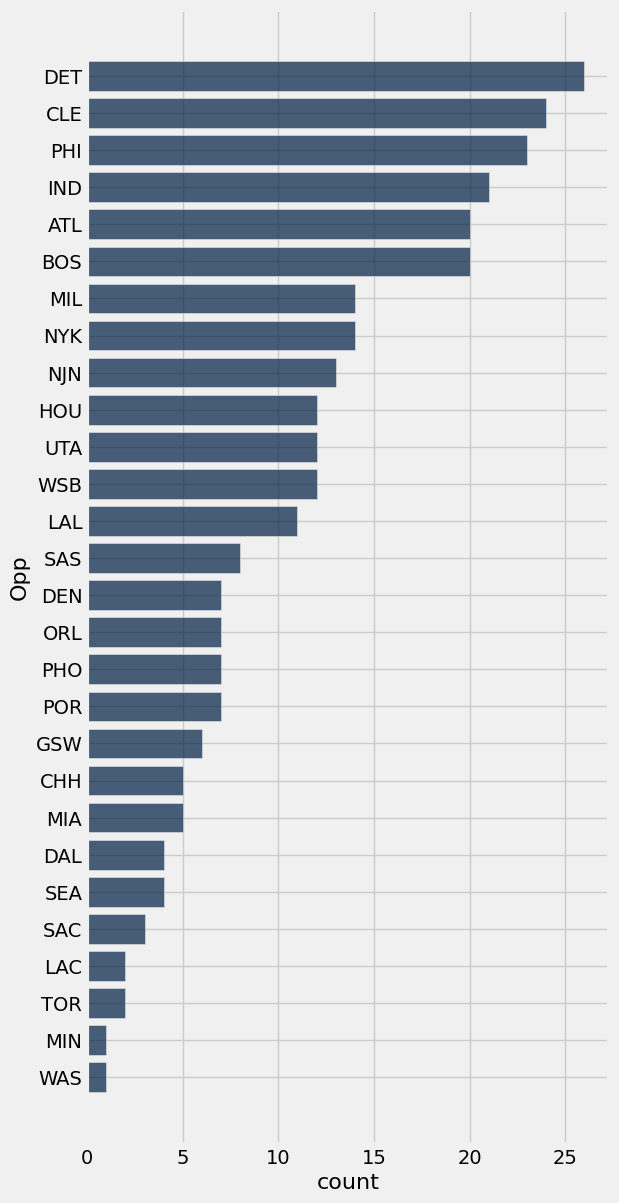

In [ ]:
TUFF_OPP.barh("Opp")

Based on this histogram, the Detroit Pistons were the toughest opponents for Michael Jordan when he played for the bulls. In the regular season, Jordan lost to the Pistons over 25 times when he played for the Bulls. This makes sense because the Detroit Pistons and Chicago Bulls were rivals back in 1990s, and the pistons caused problems for the Bulls in the playoffs.

# Acknowledgements:

Data source:
https://sports-statistics.com/sports-data-sets-for-data-modeling-visualization-predictions-machine-learning/


Picture:
https://www.cnn.com/2021/06/21/sport/michael-jordan-athlete-activism-lebron-james-colin-kaepernick-spt-intl-cmd/index.html
